In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from typing import Any, List

import matplotlib as mpl
mpl.rcParams["figure.figsize"] = [8, 6]
mpl.rcParams["font.size"] = 14

import seaborn as sns
sns.set_style("white")

# SwapSort

Consider the following sorting algorithm which sorts an array `A` of length `n`:
1. If `A` is sorted, return.
2. Otherwise choose two numbers `i` and `j` between `0` and `n - 1` independently from the uniform distribution on that range.
3. Swap `A[i]` with `A[j]`.
4. Jump to step 1.

Note that SwapSort is NOT the infamous [BogoSort](https://en.wikipedia.org/wiki/Bogosort). Apparently SwapSort is also called [BozoSort](https://xlinux.nist.gov/dads/HTML/bozoSort.html), but I like the name SwapSort since it is more illuminating, so I will stick with that name instead.

Below is a Python implementation.

In [2]:
def swapSort(A):
    n = len(A)
    while not isSorted(A):
        i = random.randint(0, n - 1)
        j = random.randint(0, n - 1)
        A[i], A[j] = A[j], A[i]
    return A  # nice for printing

def isSorted(A):
    return all((A[i] <= A[i + 1] for i in range(len(A) - 1)))

Now let's modify this implementation of `swapSort` to also count the number of iterations.

In [3]:
def swapSort(A):
    n = len(A)
    count = 0
    while not isSorted(A):
        i = random.randint(0, n - 1)
        j = random.randint(0, n - 1)
        A[i], A[j] = A[j], A[i]
        count += 1
    return A, count

In [4]:
swapSort([1,10,3,6,5])

([1, 3, 5, 6, 10], 167)

In [5]:
numSamples = 100
ns = list(range(1, 10))

samples = {n: [] for n in ns}
for n in ns:
    for _ in range(numSamples):
        A = np.random.randint(low=-2 * n, high=2 * n, size=n)
        samples[n].append(swapSort(A)[1])

samples = pd.DataFrame(data=samples)

In [6]:
samples

,1,2,3,4,5,6,7,8,9
0,0,1,8,64,60,551,8844,14268,30978
1,0,2,15,2,323,1028,8740,198442,137488
2,0,0,2,14,343,693,3724,2720,148662
3,0,0,5,5,44,545,4027,18056,83067
4,0,3,19,25,436,746,3398,16235,1540857
...,...,...,...,...,...,...,...,...,...
95,0,3,22,17,32,583,2332,23604,12174
96,0,1,5,11,228,166,1235,20068,135986
97,0,0,6,5,10,241,252,4465,127947
98,0,0,2,27,89,271,2991,19047,55985


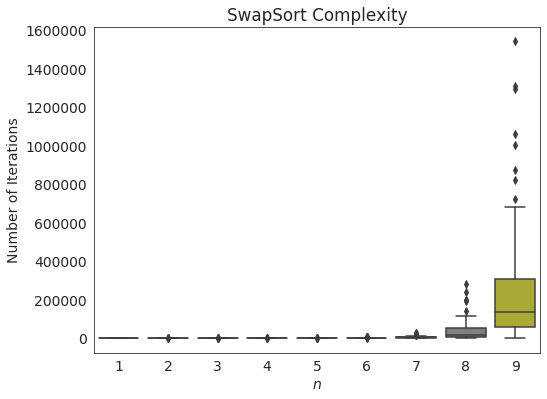

In [7]:
ax = sns.boxplot(data=samples)
ax.set(xlabel=r"$n$", ylabel="Number of Iterations",
       title="SwapSort Complexity")
ax;

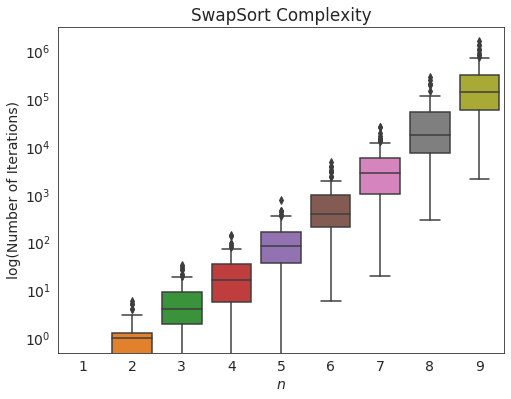

In [8]:
ax = sns.boxplot(data=samples)
ax.set_yscale("log")
ax.set(xlabel=r"$n$", ylabel="log(Number of Iterations)",
       title="SwapSort Complexity")
ax;